# Random Walk

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# define simulation function
def simulate_path(s0, mu, sigma, horizon, timesteps, n_sims):

    # set the random seed for reproducibility
    np.random.seed(10000)

    # read parameters
    S0 = s0                 # initial spot price
    r = mu                  # mu = rf in risk neutral framework
    T = horizon             # time horizon
    t = timesteps           # number of time steps
    n = n_sims              # number of simulation

    # define dt
    dt = T/t                # length of time interval

    # simulate 'n' asset price path with 't' timesteps
    S = np.zeros((t,n))
    S[0] = S0

    for i in range(0, t-1):
        w = np.random.standard_normal(n)
        S[i+1] = S[i] * (1 + r*dt + sigma*np.sqrt(dt)*w)

    return S

price_path = pd.DataFrame(simulate_path(100,0.05,0.2,1,252,100000))
price_path

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,98.418418,100.241753,99.646644,100.431733,98.793448,100.306692,98.987585,100.154929,101.248576,100.123119,...,98.199306,99.273697,100.861574,100.608802,99.889286,100.399692,99.253621,100.017423,99.546090,99.928775
2,97.059840,99.718764,97.625289,98.664249,97.588799,99.868672,100.144207,100.041077,100.528840,100.567618,...,98.259657,97.330875,101.166749,101.612757,99.910821,99.612112,97.815591,99.076714,101.471622,101.169515
3,96.822574,99.446217,98.861932,99.065891,98.013727,99.621067,101.820743,99.702732,101.159791,101.080116,...,97.504493,98.927967,101.109704,101.887146,98.467048,99.512998,97.371720,98.665132,100.631808,99.590082
4,97.419162,101.562887,98.381210,97.925548,96.842145,99.704038,103.348445,99.092866,99.046141,99.187749,...,99.989425,99.596557,102.691579,101.425596,101.190148,102.112313,95.802690,99.471950,101.898709,96.285364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,120.852871,73.800799,131.972756,85.146340,96.647391,145.306903,80.835849,116.699543,146.524625,92.837926,...,117.125200,98.044673,77.214600,126.943783,66.673986,102.493780,100.521832,107.610387,114.884035,88.209320
248,122.527621,73.744449,130.293612,85.286610,97.907263,144.821862,80.365324,115.746006,146.042448,92.667492,...,115.599845,97.862926,78.233842,125.844117,66.377655,101.677147,98.078113,106.814941,116.481455,88.013134
249,123.271121,75.682955,129.660079,83.921614,98.727483,145.548026,79.898918,115.616426,143.093503,93.073108,...,114.147618,98.887153,78.422099,123.627125,67.280394,103.011064,97.251055,107.642559,117.115391,88.060111
250,120.191906,74.536892,129.869937,83.268608,99.416004,145.089888,79.993577,115.108866,145.587400,94.805701,...,113.254915,100.110953,79.943853,123.433024,67.710034,102.352844,97.816085,105.761352,119.361116,90.104125


Text(0.5, 1.0, 'Simulation of Random Walk')

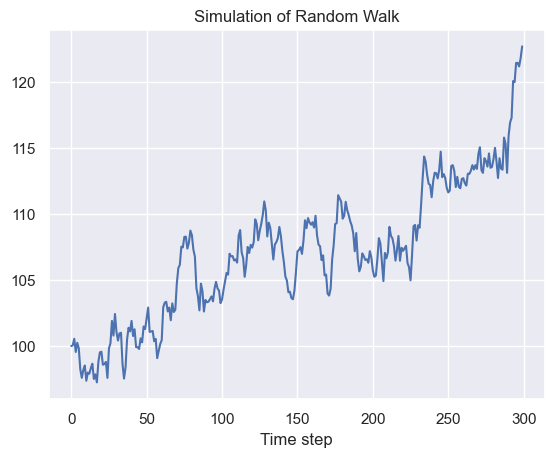

In [2]:
# Initialise paramters
t = 300; mu = 0; sigma = 1
S = np.zeros(t)
S[0] = 100

# Set random seed
np.random.seed(4)

# Generate random walk simulation
for i in range(0, t-1):
    Z = np.random.standard_normal()
    S[i+1] = S[i] + (Z*sigma + mu)
price_path = pd.DataFrame(S)
    
# Plot the simulation
fig, ax = plt.subplots()
ax.plot(price_path);
ax.set_xlabel("Time step")
ax.set_title("Simulation of Random Walk")

Text(0.5, 1.0, 'Monte Carlo Simulation of Random Walk')

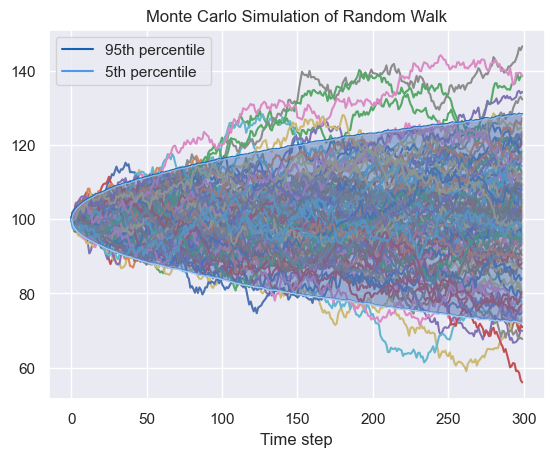

In [3]:
# Initialise paramters
t = 300; n = 10000; mu = 0; sigma = 1
S = np.zeros((t,n))
S[0] = 100

# Set random seed
np.random.seed(100)

# Generate Monte Carlo simulations of random walk model
for i in range(0, t-1):
    Z = np.random.standard_normal(n)
    S[i+1] = S[i] + (Z*sigma + mu)
price_path = pd.DataFrame(S)

# Plot the first 100 simulations with 95 and 5-percentiles
fig, ax = plt.subplots()
x = np.arange(t)
y1 = np.percentile(price_path, 95, axis=1)
y2 = np.percentile(price_path, 5, axis=1)
ax.plot(y1, color = '#1063B6', zorder=10)
ax.plot(y2, color = '#4D99ED', zorder=10)
ax.fill_between(x, y1, y2, alpha=0.5, zorder=10)
ax.legend(labels=["95th percentile","5th percentile"])

ax.plot(price_path.iloc[:,:100])
ax.set_xlabel("Time step")
ax.set_title("Monte Carlo Simulation of Random Walk")

# Geometric Brownian Motion

### Closed-Form Solution

Text(0.5, 1.0, 'Monte Carlo Simulation of Geometric Brownian Motion')

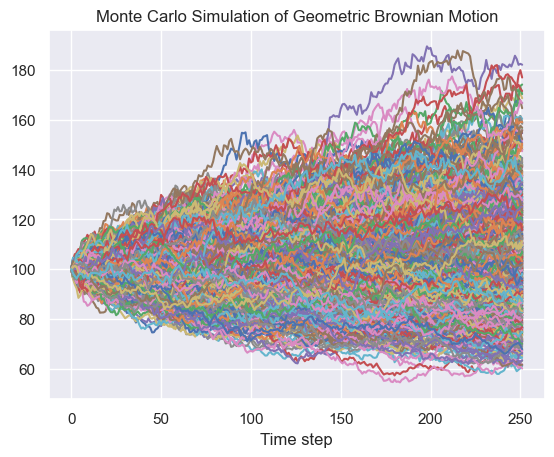

In [4]:
# set the random seed for reproducibility
np.random.seed(10000)

# Initialise parameters
S0 = 100                 # initial spot price
r = 0.05                 # drift rate
sigma = 0.2              # volatility
T = 1                    # time horizon
t = 252                  # number of time steps
n = 10000                # number of simulation

# define dt
dt = T/t                # length of time interval

# simulate 'n' asset price path with 't' timesteps
S = np.zeros((t,n))
S[0] = S0

for i in range(0, t-1):
    w = np.random.standard_normal(n)
    S[i+1] = S[i] * np.exp((r - (sigma**2)/2)*dt + sigma*np.sqrt(dt)*w)

price_path = pd.DataFrame(S)

fig, ax = plt.subplots()
ax.plot(price_path.iloc[:, :1000]);
ax.set_xlabel("Time step")
ax.set_title("Monte Carlo Simulation of Geometric Brownian Motion")

### Euler-Maruyama Method

In [5]:
# set the random seed for reproducibility
np.random.seed(10000)

# simulate 'n' asset price path with 't' timesteps
S = np.zeros((t,n))
S[0] = S0

for i in range(0, t-1):
    w = np.random.standard_normal(n)
    S[i+1] = S[i] * (1 + r*dt + sigma*np.sqrt(dt)*w)

# plt.plot(pd.DataFrame(S).iloc[:, :1000]);

### Milstein Method

In [6]:
# set the random seed for reproducibility
np.random.seed(10000)

# simulate 'n' asset price path with 't' timesteps
S = np.zeros((t,n))
S[0] = S0

for i in range(0, t-1):
    w = np.random.standard_normal(n)
    S[i+1] = S[i] * (1 + r*dt + sigma*np.sqrt(dt)*w + (1/2)*(sigma**2)*((w**2)-1)*dt)
    
# plt.plot(pd.DataFrame(S).iloc[:, :1000]);

# Financial Forecasting

In [7]:
# Define assumptions
t = 12; fixed_cost = 2; var_margin = 0.1; mu = 0.02/12

# Initialise matrices
profits, revenue = np.zeros(t), np.zeros(t)

# Assign value for the 1st period
revenue[0] = 100
profits[0] = revenue[0] - fixed_cost - revenue[0]*var_margin

# Generate the forecast
for i in range(0, t-1):
    revenue[i+1] = revenue[i]*(1+mu)
    profits[i+1] = revenue[i+1] - fixed_cost - revenue[i]*var_margin

profits

array([88.        , 88.16666667, 88.31694444, 88.46747269, 88.61825181,
       88.76928223, 88.92056436, 89.07209864, 89.22388547, 89.37592528,
       89.52821849, 89.68076552])

### Modelling Revenue as Stochastic

Text(0.5, 1.0, 'Monte Carlo Simulation of Revenue as Stochastic')

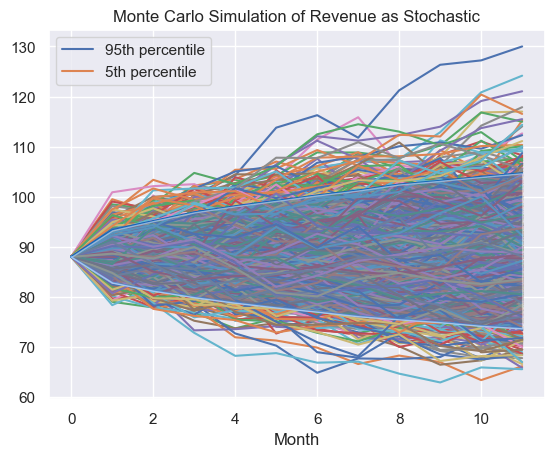

In [8]:
# Define assumptions
t = 12; fixed_cost = 2; var_margin = 0.1; mu = 0.02/12; sigma = 0.5; n = 10000

# Initialise matrices
profits, revenue = np.zeros((t,n)), np.zeros((t,n))

# Assign value for the 1st period
revenue[0] = 100
profits[0] = revenue[0] - fixed_cost - revenue[0]*0.1

# Generate the forecast simulations
np.random.seed(100)
for i in range(0, t-1):
    w = np.random.standard_normal(n)
    revenue[i+1] = revenue[i] * np.exp((r - (sigma**2)/2)*dt + sigma*np.sqrt(dt)*w)
    profits[i+1] = revenue[i+1] - fixed_cost - revenue[i]*0.1
    
profits = pd.DataFrame(profits)
fig, ax = plt.subplots()
ax.plot(pd.DataFrame(profits).iloc[:, :1000]);

x = np.arange(t)
y1 = np.percentile(profits, 95, axis=1)
y2 = np.percentile(profits, 5, axis=1)
ax.plot(y1, color = '#1063B6', zorder=10)
ax.plot(y2, color = '#4D99ED', zorder=10)
ax.fill_between(x, y1, y2, alpha=0.5, zorder=10)
ax.legend(labels=["95th percentile","5th percentile"])
ax.set_xlabel("Month")
ax.set_title("Monte Carlo Simulation of Revenue as Stochastic")

### Modelling Cost as Stochastic

Text(0.5, 1.0, 'Monte Carlo Simulation of Variable Cost as Stochastic \n with Demand Curve')

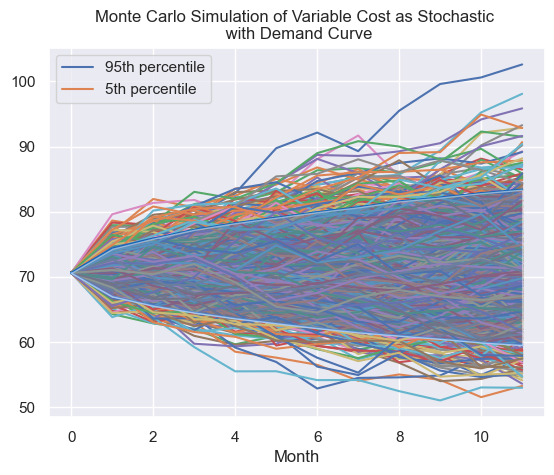

In [9]:
# Define assumptions
t = 12; fixed_cost = 2; mu = 0.02/12; sigma = 0.5; n = 10000; markup = 4

# Initialise matrices
profits, costs, prices, quantities = np.zeros((t,n)), np.zeros((t,n)), np.zeros((t,n)), np.zeros((t,n))

# Assign value for the 1st period
costs[0] = 0.5
prices[0] = markup*costs[0]   #Price = markup x variable cost
quantities[0] = 50 - 0.8*prices[0]   #Demand curve
profits[0] = quantities[0]*prices[0] - fixed_cost - quantities[0]*costs[0]

# Generate the forecast simulations
np.random.seed(100)
for i in range(0, t-1):
    w = np.random.standard_normal(n)
    costs[i+1] = costs[i] * np.exp((r - (sigma**2)/2)*dt + sigma*np.sqrt(dt)*w)
    prices[i+1] = markup*costs[i+1]
    quantities[i+1] = 50 - 0.8*prices[i+1]
    profits[i+1] = quantities[i+1]*prices[i+1] - fixed_cost - quantities[i+1]*costs[i+1]
    
profits = pd.DataFrame(profits)
fig, ax = plt.subplots()
ax.plot(pd.DataFrame(profits).iloc[:, :1000]);

x = np.arange(t)
y1 = np.percentile(profits, 95, axis=1)
y2 = np.percentile(profits, 5, axis=1)
ax.plot(y1, color = '#1063B6', zorder=10)
ax.plot(y2, color = '#4D99ED', zorder=10)
ax.fill_between(x, y1, y2, alpha=0.5, zorder=10)
ax.legend(labels=["95th percentile","5th percentile"])
ax.set_xlabel("Month")
ax.set_title("Monte Carlo Simulation of Variable Cost as Stochastic \n with Demand Curve")